# 레버리지와 아웃라이어

## 레버리지 (Leverage)

개별적인 데이터 표본이 회귀 분석 결과에 미치는 영향은 레버리지(leverage)분석을 통해 알 수 있다.

레버리지는 target value $y$가 예측된(predicted) target $\hat{y}$에 미치는 영향을 나타낸 값이다. self-influence, self-sensitivity 라고도 한다

레버리지는 `RegressionResults` 클래스의 `get_influence` 메서드로 구할 수 있다.

* weight vector

$$  w = (X^TX)^{-1} X^T y $$

$$  \hat{y} = X w = X((X^TX)^{-1} X^T y ) = ( X(X^TX)^{-1} X^T) y = Hy $$

* leverage $h_{ii}$
$$  h_{ii}=(H)_{ii} $$


* leverage 특성
$$  0 \leq h_{ii} \leq 1 $$


$$  \sum_i^N h_{ii} = 2 $$

* leverages는 어떤 데이터 포인트가 예측점을 자기 자신의 위치로 끌어 당기는 정도
 * 만약 $h_{ii} \simeq 1$이면 
 $$ \hat{y} \simeq y $$


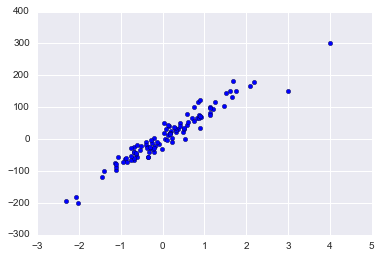

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

# add high-leverage points
X0 = np.vstack([X0, np.array([[4], [3]])])
X = sm.add_constant(X0)
y = np.hstack([y, [300, 150]])
plt.scatter(X0, y)
plt.show()

In [3]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Wed, 07 Sep 2016   Prob (F-statistic):           1.61e-61
Time:                        08:49:18   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

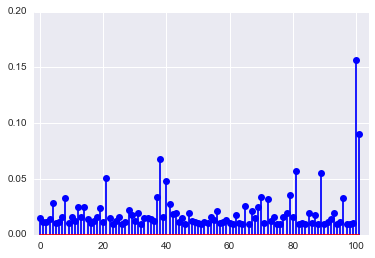

hat.sum() = 2.0


In [4]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([-2, len(y)+2, 0, 0.2])
plt.show()
print("hat.sum() =", hat.sum())

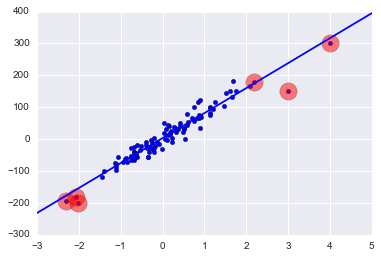

In [5]:
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=plt.gca())

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])
plt.show()

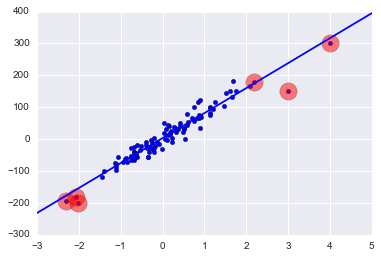

In [4]:
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=plt.gca())

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])
plt.show()

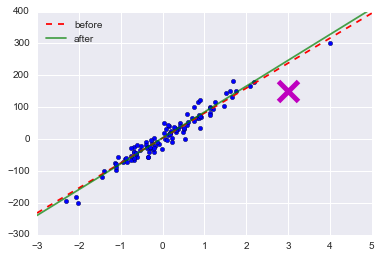

In [8]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()
plt.scatter(X0, y);
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=plt.gca())
sm.graphics.abline_plot(model_results=result2, c="g", alpha=0.7, ax=plt.gca())
plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.axis([-3, 5, -300, 400])
plt.legend(["before", "after"], loc="upper left")
plt.show()

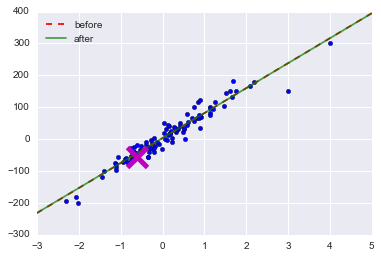

In [9]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()
plt.scatter(X0, y);
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=plt.gca())
sm.graphics.abline_plot(model_results=result3, c="g", alpha=0.7, ax=plt.gca())
plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.axis([-3, 5, -300, 400])
plt.legend(["before", "after"], loc="upper left")
plt.show()

## Outlier


* Good Leverage Points
 * leverage가(영향력이) 높지만 residual이(오차가) 작은 데이터


* Bad Leverage Points = **Outliner**
 * leverage도(영향력도) 높지만 residual도(오차도) 큰 데이터

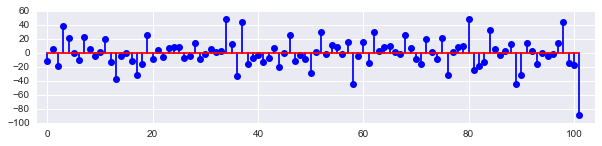

In [10]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.xlim([-2, len(y)+2])
plt.show()

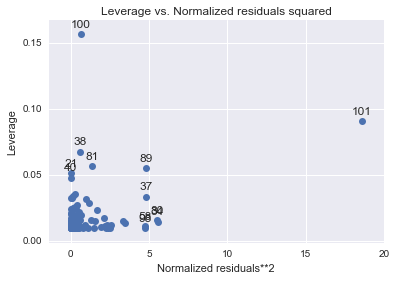

In [11]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

## Influence

* Cook's Distance
 * (normalized) residual과 leverage의 복합 측도
  
 $$ D_i = \frac{e_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right] $$
 
 
* Fox' Outlier Recommendation
  $$ D_i > \dfrac{4}{N − 2} $$

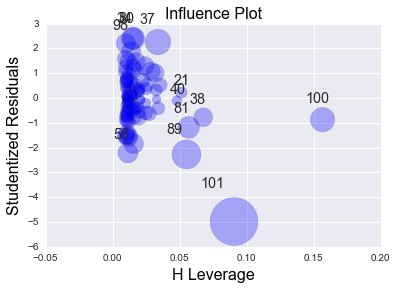

In [13]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

TypeError: 'zip' object is not subscriptable

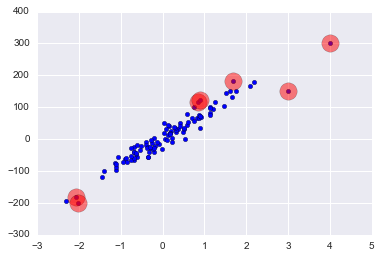

In [14]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400])

from statsmodels.graphics import utils
utils.annotate_axes(range(len(idx)), idx, zip(X0[idx], y[idx]), [(-20,15)]*len(idx), size="large", ax=plt.gca())
plt.show()

TypeError: 'zip' object is not subscriptable

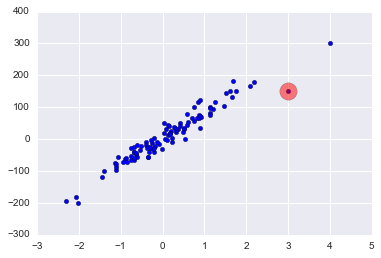

In [15]:
idx = np.nonzero(result.outlier_test().ix[:, -1].abs() < 0.9)[0]
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.axis([-3, 5, -300, 400]);
utils.annotate_axes(range(len(idx)), idx, zip(X0[idx], y[idx]), [(-10,10)]*len(idx), size="large", ax=plt.gca())
plt.show()

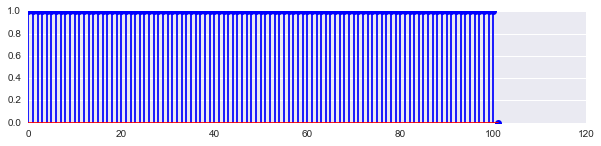

In [14]:
plt.figure(figsize=(10, 2))
plt.stem(result.outlier_test().ix[:, -1])
plt.show()